In [27]:
#!/usr/bin/env python
# import analyzer
import importlib
from importlib import reload
import os, sys, glob, warnings, glob
import scipy
import numpy as np
import scipy as sp
import joblib
# from tqdm.notebook import tqdm
from tqdm import tqdm
import copy as cp

# ROOT
import ROOT as root

# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import collections, colors, transforms

from pylab import *
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [28]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(iterator, *args, **kwargs):
        return iterator
sys.path.append("/home/owhgabri/My_GitHub/pyTracker/tracker")
sys.path.insert(1, "/home/owhgabri/My_GitHub/pyTracker/tracker")
os.chdir('/home/owhgabri/My_GitHub/pyTracker')
print(os.getcwd())
print(joblib.__version__)

/home/owhgabri/My_GitHub/pyTracker
1.4.2


In [68]:
def sortByTime(points):
    """
    Sorts list of lists of the form [[x,y,z,t],[x,y,z,t]]
    by time
    """
    if len(points) <= 1:
        return points
    pivot = points[len(points) // 2]
    left = []
    middle = []
    right = []
    for point in points:
        if point[3] < pivot[3]:
            left.append(point)
        elif point[3] > pivot[3]:
            right.append(point)
        elif point[3] == pivot[3]:
            middle.append(point)
    return sortByTime(left) + middle + sortByTime(right)

def getDigiTracks(i, Tree):
    """
    Return an array in which each array is an event,
    and each sub-array is a 4xn array ([x,y,z],[x,y,z]) 
    representing the points of a track
    """
    Tree.GetEntry(i)
    eventTracks = []
    used_tracks = []

    for j in range(len(Tree.Digi_track_id)):
        TrackID = Tree.Digi_track_id[j]
        if TrackID in used_tracks:
            continue
        used_layers = []
        track = []
        for k in range(len(Tree.Digi_track_id)):
            if Tree.Digi_track_id[k] == TrackID and Tree.Digi_layer_id[k] not in used_layers and Tree.Digi_type[k] != 2 and Tree.Digi_layer_id[k] > 3:
                used_layers.append(Tree.Digi_layer_id[k])
                track.append([Tree.Digi_x[k], Tree.Digi_y[k], Tree.Digi_z[k], Tree.Digi_time[k]])
                track = sortByTime(track)
        used_tracks.append(TrackID)
        if len(used_layers) >= 3:
            eventTracks.append(track)
        else:
            eventTracks.append([])
    for t in eventTracks:
        print(t)
    return eventTracks
            

    

In [41]:
dataFile = f"/home/owhgabri/My_GitHub/data/DigiOutput/10xCosmicBackground/24/0/stat0.root"

tfile = root.TFile.Open(dataFile, "READ")
Tree = tfile.Get("integral_tree")
print(Tree.GetEntries())

print(branch_list)

# Using all files, rather than just one 
Digi_top_dir = f"/home/owhgabri/My_GitHub/data/DigiOutput/10xCosmicBackground"
DigiList=[]

for rootFile, dirs, files in os.walk(Digi_top_dir):
    for filename in files:
        if "stat0" in filename:
            DigiList.append(os.path.join(rootFile, filename))

# Using all files, rather than just one 
Recon_top_dir = f"/home/owhgabri/My_GitHub/data/Reconstruction/10xCosmicBackground"
ReconList=[]

for rootFile, dirs, files in os.walk(Recon_top_dir):
    for filename in files:
        if "stat0" in filename:
            ReconList.append(os.path.join(rootFile, filename))


347
['NumHits', 'Hit_energy', 'Hit_time', 'Hit_Center1', 'Hit_Center2', 'Hit_bar_direction', 'Hit_layer_direction', 'Hit_LayerID', 'Hit_particlePdgId', 'Hit_G4TrackId', 'Hit_G4ParentTrackId', 'Hit_x', 'Hit_y', 'Hit_z', 'Hit_particleEnergy', 'Hit_particlePx', 'Hit_particlePy', 'Hit_particlePz', 'Hit_type', 'Digi_numHits', 'Digi_time', 'Digi_x', 'Digi_y', 'Digi_z', 'Digi_energy', 'Digi_px', 'Digi_py', 'Digi_pz', 'Digi_particle_energy', 'Digi_pdg_id', 'Digi_track_id', 'Digi_type', 'Digi_center1', 'Digi_center2', 'Digi_bar_direction', 'Digi_layer_direction', 'Digi_layer_id', 'Digi_det_id', 'Digi_seed', 'Digi_hitIndices', 'GenParticle_index', 'GenParticle_G4index', 'GenParticle_pdgid', 'GenParticle_time', 'GenParticle_x', 'GenParticle_y', 'GenParticle_z', 'GenParticle_energy', 'GenParticle_px', 'GenParticle_py', 'GenParticle_pz', 'GenParticle_mass']


In [42]:
tfile = root.TFile.Open(DigiList[0], "READ")
Tree = tfile.Get("integral_tree")
nevents = int(Tree.GetEntries())
AllTracks = []
Tree.GetEntry(34)
eventTracks = []
used_tracks = []
print("Digi x:", Tree.Digi_x)
print("\n")


events=joblib.load(ReconList[0])
file_hits = events["hits"]
file_tracks = events["tracks"]
file_vertices = events["vertices"]
hits = file_hits[34]
hitPrint = []
for hit in hits:
    hitPrint.append((hit.x, hit.ind))
print("Hits", hitPrint)
            

Digi x: { 119.75000, 164.10353, 376.25000, 393.59145, 385.25000, 395.16102, 486.75000, 479.84217, -489.59919, -493.25000, -498.23861, -497.75000, -484.25000, -547.18930, -485.50971, -1870.5834, -939.74293, 572.75757, 279.29018, 218.75000, 1736.2500, -1043.2500, 577.72856, 823.45281, -845.25000, -530.25000, 747.75000, -1353.7500 }


Hits [(486.75, 6), (479.84217172826976, 7), (-489.5991875789454, 8), (-1043.25, 21), (577.7285606833175, 22), (823.4528066357598, 23), (-845.25, 24), (-530.25, 25), (747.75, 26), (119.75, 0), (164.10353271221, 1), (376.25, 2), (393.5914545898283, 3), (385.25, 4), (395.1610185486393, 5), (-493.25, 9), (-498.23860832067925, 10), (-497.75, 11), (-484.25, 12), (-547.1893014912306, 13), (-485.50970877219993, 14), (-1870.5834100604989, 15), (-939.7429303498939, 16), (572.7575685246848, 17), (279.2901789653115, 18), (218.75, 19), (1736.25, 20), (-1353.75, 27)]


In [70]:
for f in range(len(ReconList)): # Go through each file
    tfile = root.TFile.Open(DigiList[f], "READ")
    Tree = tfile.Get("integral_tree")
    events=joblib.load(ReconList[f])
    file_hits = events["hits"]
    file_tracks = events["tracks"]
    file_vertices = events["vertices"]
    end = False
    for i in range(len(file_hits)): # For each event
        hits= file_hits[i]
        tracks = file_tracks[i]
        vertices = file_vertices[i]
        if len(tracks) > 2:
            tfile = root.TFile.Open(DigiList[f], "READ")
            Tree = tfile.Get("integral_tree")
            DigiTracks = getDigiTracks(i, Tree)
            end = True
            break
    if end:
        break

i = 45
f = 0
tfile = root.TFile.Open(DigiList[f], "READ")
Tree = tfile.Get("integral_tree")
events=joblib.load(ReconList[0])
file_hits = events["hits"]
file_tracks = events["tracks"]
file_vertices = events["vertices"]
end = False
hits= file_hits[i]
tracks = file_tracks[i]
vertices = file_vertices[i]

tfile = root.TFile.Open(DigiList[f], "READ")
Tree = tfile.Get("integral_tree")
DigiTracks = getDigiTracks(i, Tree)
end = True


[]
[[406.6718604093303, 9894.0, 9677.25, 461.99376330898474], [371.75, 9975.6, 9738.821860437165, 464.6402454907835], [382.30037870603496, 10057.2, 9825.75, 469.19762912690663]]
[]
[]
[[461.75, 9975.6, 9705.174049505176, 465.5727723096672], [529.7216816933108, 10057.2, 9807.75, 470.8021151341839], [556.25, 10138.8, 9850.91153199819, 473.1300125731429]]
[]
[[356.50404700882297, 9894.0, 9641.25, 461.7659502882467], [340.25, 9975.6, 9698.791610416047, 465.5185878563894], [343.26826724936063, 10057.2, 9780.75, 468.8133978584497], [335.75, 10138.8, 9827.906583808672, 470.7779846630512]]
[]
[]
[]
[]
[]
[]
[[193.42597526655047, 9706.45, 11064.0, 398.3991112900987], [268.25, 9385.577792720145, 10982.4, 409.9666971400141], [353.8411130346866, 9040.45, 10900.8, 422.04736894199334]]
[[1335.75, 10138.8, 8097.971918099691, 189.37448326994806], [1308.6453783508703, 10057.2, 8155.25, 194.50933712756262], [1900.6759125200324, 9894.0, 8708.75, 1123.4090113154593]]
[]
[[-412.9335212006852, 9894.0, 9510.



5
6
7


10
9
8


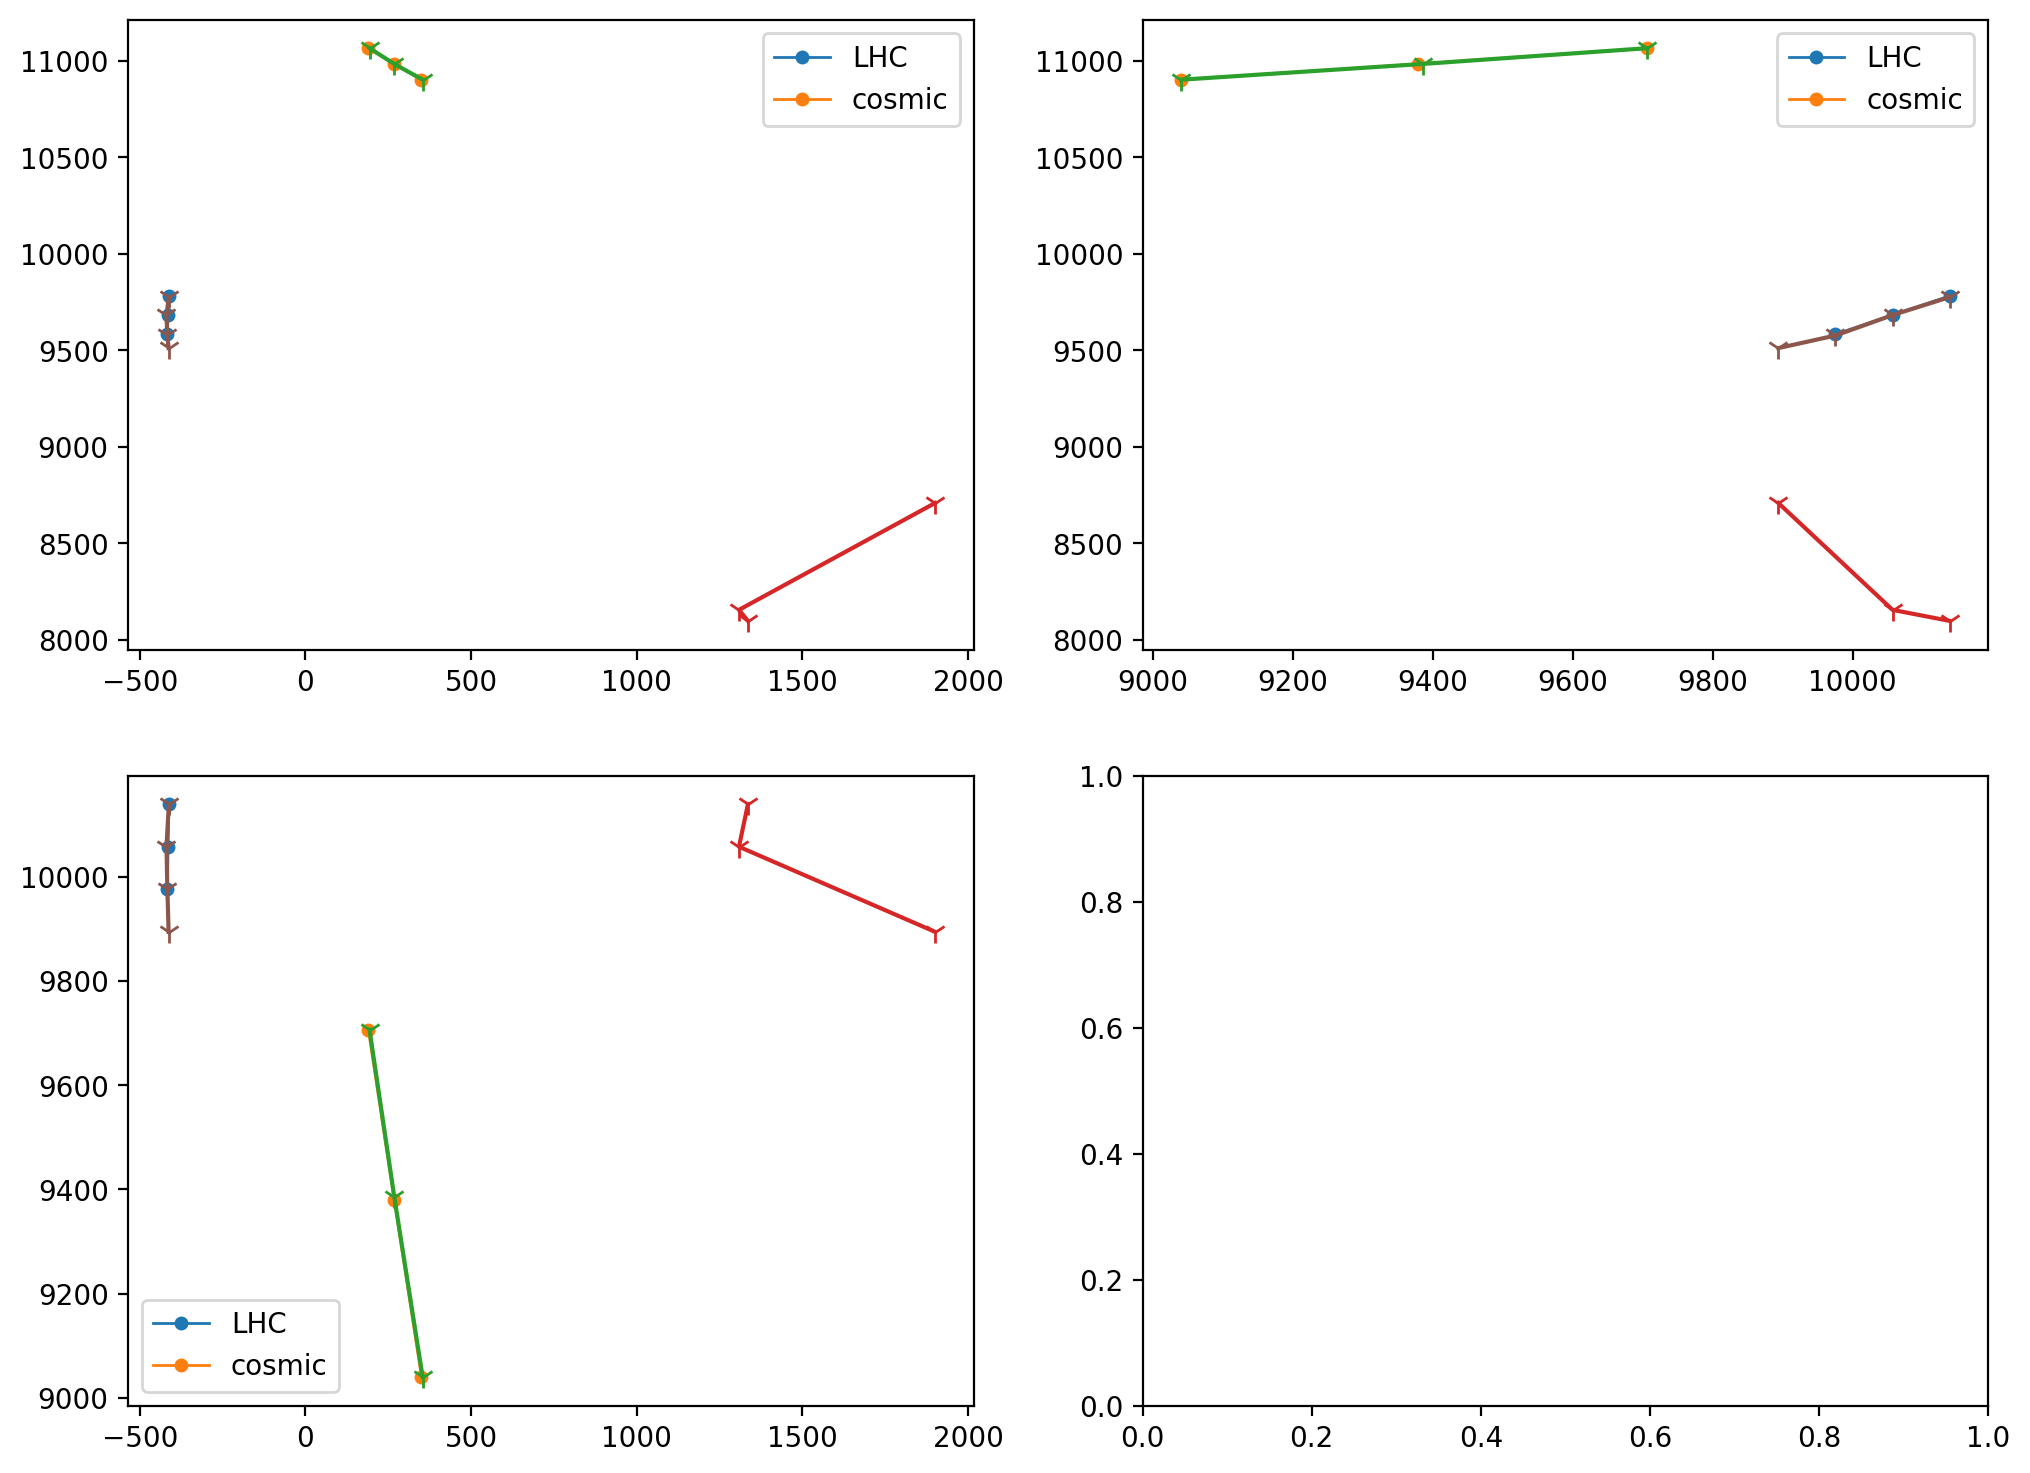

In [71]:
fig,axs=plt.subplots(2,2,figsize=(12,9))
axs=axs.flatten().tolist()

for vertex in vertices:
    vx = vertex.x0
    vy = vertex.y0
    vz = vertex.z0
    axs[0].plot(vx, vz, marker="+",markersize=8)
    axs[1].plot(vy, vz, marker="+", markersize=8)
    axs[2].plot(vx, vy, marker="+", markersize=8)
# Plot tracks
for track in tracks:
    # Each track is a list of each point is [x,y,z,t, PID, Energy, TRACK_ID]
    # x,y,z = coord_cms2det(np.array(track.hits_filtered).T)      
    x,y,z = np.array(track.hits_filtered).T[:3]
    print("\n")
    types = []
    hits_used = track.hits
    for hit in hits:
        if hit.ind in hits_used:
            print(hit.layer)
            if hit.type not in types:
                types.append(hit.type)
    if 0 in types and 1 in types and 2 in types:
        axs[0].plot(x, z,marker=".",linewidth=1,markersize=8,label="all")
        axs[1].plot(y, z,marker=".",linewidth=1,markersize=8,label="all")
        axs[2].plot(x, y,marker=".",linewidth=1,markersize=8,label="all")
    elif 0 in types and 1 in types:
        axs[0].plot(x, z,marker=".",linewidth=1,markersize=8,label="LHC + cosmic")
        axs[1].plot(y, z,marker=".",linewidth=1,markersize=8,label="LHC + cosmic")
        axs[2].plot(x, y,marker=".",linewidth=1,markersize=8,label="LHC + cosmic")
    elif 0 in types and 2 in types:
        axs[0].plot(x, z,marker=".",linewidth=1,markersize=8,label="LHC + noise")
        axs[1].plot(y, z,marker=".",linewidth=1,markersize=8,label="LHC + noise")
        axs[2].plot(x, y,marker=".",linewidth=1,markersize=8,label="LHC + noise")
    elif 1 in types and 2 in types:
        axs[0].plot(x, z,marker=".",linewidth=1,markersize=8,label="cosmic + noise")
        axs[1].plot(y, z,marker=".",linewidth=1,markersize=8,label="cosmic + noise")
        axs[2].plot(x, y,marker=".",linewidth=1,markersize=8,label="cosmic + noise")
    elif 0 in types:
        axs[0].plot(x, z,marker=".",linewidth=1,markersize=8,label="LHC")
        axs[1].plot(y, z,marker=".",linewidth=1,markersize=8,label="LHC")
        axs[2].plot(x, y,marker=".",linewidth=1,markersize=8,label="LHC")
    elif 1 in types:
        axs[0].plot(x, z,marker=".",linewidth=1,markersize=8,label="cosmic")
        axs[1].plot(y, z,marker=".",linewidth=1,markersize=8,label="cosmic")
        axs[2].plot(x, y,marker=".",linewidth=1,markersize=8,label="cosmic")
    elif 2 in types:
        axs[0].plot(x, z,marker=".",linewidth=1,markersize=8,label="noise")
        axs[1].plot(y, z,marker=".",linewidth=1,markersize=8,label="noise")
        axs[2].plot(x, y,marker=".",linewidth=1,markersize=8,label="noise")
    # axs[0].xlabel("x")
    # axs[0].ylabel("z")
    axs[0].legend()
    # axs[1].xlabel("y")
    # axs[1].ylabel("z")
    axs[1].legend()
    # axs[2].xlabel("y")
    # axs[2].ylabel("z")
    axs[2].legend()

for track in DigiTracks:
    x = []
    y = []
    z = []
    for point in track:
        x.append(point[0])
        y.append(point[1])
        z.append(point[2])
    axs[0].plot(x, z, marker="1",markersize=8)
    axs[1].plot(y, z, marker="1", markersize=8)
    axs[2].plot(x, y, marker="1", markersize=8)
    